# Sprint 11 - Lab 1. Víctor Guilló Seuthe

### Importar librerías

In [131]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import re
import sklearn

### Importar datos

In [132]:
# directorio de trabajo
# os.chdir('P:\\repos\\03_edix\\S11_L1_entrega')

In [133]:
# importar datos
df = pd.read_csv("../data/MDA_churn_data.csv", encoding='latin-1')
df_bk = df.copy()

### EDA

Muestra de datos y manipulación de tablas para la eliminación de campos innecesarios, y la creación de variables dicotómicas relevantes para su posterior modelado.

In [134]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3158,7410-KTVFV,Male,0,Yes,No,18,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.55,878.35,Yes
3898,2332-TODQS,Female,0,No,No,48,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),25.05,1171.5,No
4066,4872-VXRIL,Male,0,No,No,56,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Bank transfer (automatic),64.65,3665.55,No
1060,6100-FJZDG,Male,0,Yes,Yes,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.05,505.9,No
6379,0940-OUQEC,Male,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.70,788.8,Yes


In [135]:
# mostrar tipos de datos
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [136]:
# comprobar falta de datos
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [137]:
# 0 numericos, 1 boolean, 2 categoricos, otros binarios 3

features = [('gender', 3),
            ('SeniorCitizen', 3), 
            ('Partner', 1),
            ('Dependents', 1),
            ('tenure', 0),
            ('PhoneService', 1),
            ('MultipleLines', 1),
            ('InternetService', 2),
            ('OnlineSecurity', 1),
            ('OnlineBackup', 1),
            ('DeviceProtection', 1),
            ('TechSupport', 1),
            ('StreamingTV', 1), 
            ('StreamingMovies', 1),
            ('Contract', 2),
            ('PaperlessBilling', 1),
            ('PaymentMethod', 0),
            ('MonthlyCharges', 0),
            ('TotalCharges', 0),
            ('Churn', 1)
           ]

In [138]:
# modificamos servicios no existentes a valor "No"
df = df.replace(to_replace=r'^No.*service$', value="No", regex=True)

# modificamos valores Yes/No a 1/0
for feature in features:
    if feature[1] == 1:
        df[feature[0]] = df[feature[0]].map({"Yes": 1, "No": 0})

In [139]:
# almacenamos listas de categorias de servicios, pagos y contratos
categories = []

InternetServices = list(df['InternetService'].unique())
for i, j in enumerate(InternetServices):
    InternetServices[i] = (j.split()[0]+"_Inet", j)

PaymentMethods =  list(df['PaymentMethod'].unique())
for i, j in enumerate(PaymentMethods):
    PaymentMethods[i] = (PaymentMethods[i].split()[0]+"Pay", j)

Contracts =  list(df['Contract'].unique())
for i, j in enumerate(Contracts):
    Contracts[i] = (j.replace("-"," ").split()[0]+"_period", j)

categories.append(InternetServices)
categories.append(PaymentMethods)
categories.append(Contracts)

In [140]:
# one hot encoding
for feature in InternetServices:
    df[feature[0]] = (df['InternetService']==feature[1]).astype(int)

for feature in PaymentMethods:
    df[feature[0]] = (df['PaymentMethod']==feature[1]).astype(int)
       
for feature in Contracts:
    df[feature[0]] = (df['Contract']==feature[1]).astype(int)

In [141]:
# descartar posibles valores no binarios en gender
df[(df['gender'] != 'Male') & (df['gender'] != 'Female')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DSL_Inet,Fiber_Inet,No_Inet,ElectronicPay,MailedPay,BankPay,CreditPay,Month_period,One_period,Two_period


In [142]:
# encode female / not female
df['Female'] = (df['gender']=="Female").astype(int)

In [143]:
# eliminar columnas categorizadas o innecesarias
df = df.drop(['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod'], axis = 1).reset_index(drop=True)

In [144]:
df.sample(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Fiber_Inet,No_Inet,ElectronicPay,MailedPay,BankPay,CreditPay,Month_period,One_period,Two_period,Female
1601,0,1,0,46,1,1,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0
2958,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
3637,0,0,0,9,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3696,0,1,0,6,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3022,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
3925,0,1,0,37,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
4159,1,0,0,59,1,1,1,1,1,0,...,1,0,1,0,0,0,1,0,0,1
5630,0,0,0,39,1,1,0,1,1,0,...,1,0,1,0,0,0,1,0,0,1
3068,0,1,0,51,1,1,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2121,0,0,0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


#### Gráficos de análisis

##### Correlación entre variables (features)

<AxesSubplot:>

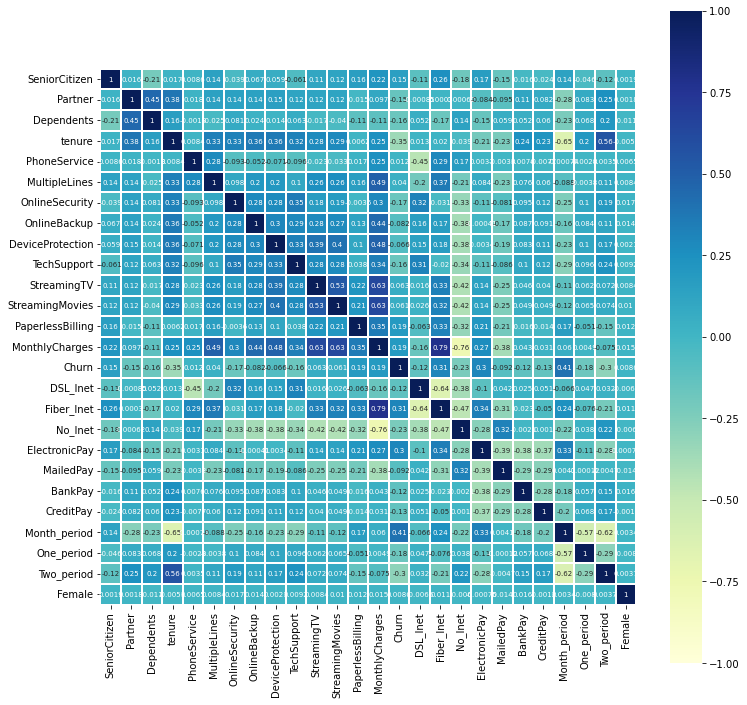

In [145]:
# formats
sns.axes_style("whitegrid")

# crear figura
fig, ax = plt.subplots(figsize=(12,12)) 

# plot heatmap
corr_data = df.corr()
sns.heatmap(corr_data,
            vmin=-1,
            vmax=1,
            square=True,
            cmap="YlGnBu",
            linewidths=0.1,
            annot=True,
            annot_kws={"fontsize":7, }
        )